In [1]:
import numpy as np
import matplotlib.pyplot as plt

############### Define Models ###################

# Gaussian intensity profile
def I(P,W,r):
    
    I = (P/(np.pi*W**2/2)) * np.exp(-2*r**2/W**2)
    
    return I

#P = power
#W = FWHM
#r = radial distance

# Overlap array
def overlap(Pc,Ps,Wc,Ws,r):
    
    eta = np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
    
    return eta

# Normalisation constant
def C(Pc,Ps,Wc,Ws,r):
    
    C = 1 / np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
    
    return C

In [2]:
################### Set Parameters #####################

Wb = 1              # Bulk width
Ww = np.linspace(Wb/3000,Wb/3,100) # Waveguide width
Pcb = 5             # Control power in bulk
Psb = Pcb/1e15        # Single-photon power in bulk

# Normalize rabi-freq when coupling into waveguide 
Pcw = Pcb * Ww**2 / Wb**2 #* np.exp(1/Wb**2 - 1/Ww**2)
Psw = Psb #* Ww**2 / Wb**2 * np.exp(1/Wb**2 - 1/Ww**2)

r = np.linspace(-3,3,100)   # radial range

C:\Users\fdg2\AppData\Local\Temp\ipykernel_26952\2590128597.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1 / np.sum(I(Pc,Wc,r) * I(Ps,Ws,r))
C:\Users\fdg2\AppData\Local\Temp\ipykernel_26952\798614677.py:11: RuntimeWarning: invalid value encountered in double_scalars
  efficiency_bulk[i] = Cb[i] * overlap(Pcb,Psb,Wb,Ww[i],r)
C:\Users\fdg2\AppData\Local\Temp\ipykernel_26952\798614677.py:13: RuntimeWarning: invalid value encountered in double_scalars
  efficiency_waveguide[i] = Cb[i]*overlap(Pcw[i],Psw,Ww[i],Ww[i],r)


Text(0, 0.5, 'Efficiency $\\eta$')

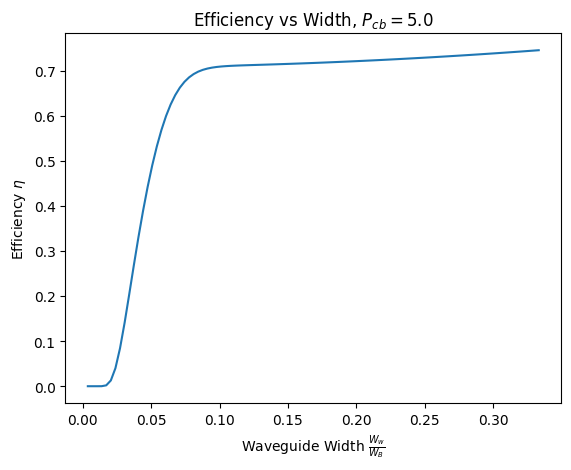

In [3]:
################### Compute Efficiency #####################

Cb = np.zeros(len(Ww))
efficiency_bulk = np.zeros(len(Ww))
efficiency_waveguide = np.zeros(len(Ww))

for i in range(len(Ww)):
    
    Cb[i] = C(Pcb,Psb,Wb,Ww[i],r)
    
    efficiency_bulk[i] = Cb[i] * overlap(Pcb,Psb,Wb,Ww[i],r)

    efficiency_waveguide[i] = Cb[i]*overlap(Pcw[i],Psw,Ww[i],Ww[i],r)

################### Plot figures #####################

plt.figure()
plt.title(r'Efficiency vs Width, $P_{cb} = %.1f$' %Pcb)

plt.plot(Ww, efficiency_waveguide, label = 'Waveguide')
#plt.plot(Ww, efficiency_bulk, label = 'Bulk')

plt.xlabel(r'Waveguide Width $\frac{W_w}{W_B}$')
plt.ylabel(r'Efficiency $\eta$')